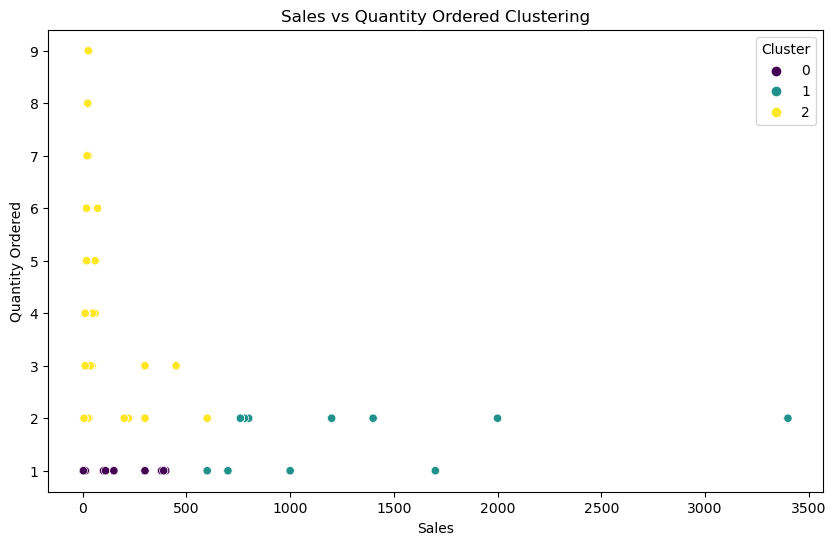

[[-2.80906290e-01 -2.88197279e-01 -2.64412058e-04  8.03472997e-02
   5.31563054e-02  1.06791928e-01  7.93681227e-02  1.59242952e-01
   1.34030854e-01  6.70017324e-02  2.40884409e-01  7.91763957e-02]
 [-2.75401903e-01  2.25080045e+00  3.90872474e-03  8.17601702e-02
   5.28671453e-02  1.06487636e-01  7.99875920e-02  1.58512807e-01
   1.33962599e-01  6.60728530e-02  2.41247895e-01  7.91013028e-02]
 [ 2.72378221e+00 -5.01813068e-01 -2.85932544e-03  7.50735167e-02
   5.47194834e-02  1.11572392e-01  8.21080551e-02  1.59833939e-01
   1.31407484e-01  6.85579196e-02  2.36925561e-01  7.98016491e-02]]


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
csv_file = '/Users/issacmiao/Downloads/sales_data.csv'
df = pd.read_csv(csv_file)

# Clean the data
df.dropna(inplace=True)

# Ensure correct data types
df['sale_date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['hour'] = df['sale_date'].dt.hour

# Drop rows with invalid data
df.dropna(subset=['Quantity Ordered', 'Sales', 'hour'], inplace=True)

# Feature Encoding: Encode categorical data like 'City'
encoder = OneHotEncoder(sparse_output=False)  # Update to avoid sparse deprecation warning
city_encoded = encoder.fit_transform(df[['City']])

# Creating a DataFrame with encoded city features
city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['City']))

# Standardize the numerical data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Quantity Ordered', 'Sales', 'hour']])

# Combine scaled numerical data and encoded categorical data
clustering_data = pd.concat([pd.DataFrame(df_scaled, columns=['Quantity Ordered', 'Sales', 'hour']), city_encoded_df], axis=1)

# Clustering with KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_data)

# Visualization of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Sales'], y=df['Quantity Ordered'], hue=df['Cluster'], palette='viridis')
plt.title('Sales vs Quantity Ordered Clustering')
plt.show()

# Check cluster centers
print(kmeans.cluster_centers_)
